# Évaluation des modèles

CSI 4506 - Automne 2024

Marcel Turcotte  
Version: sept. 30, 2024 08h54

# Préambule

## Citation du jour

<https://youtu.be/hubWIuuz-e4>

[Rapport d’Impact sur la Sécurité Waymo
2024](https://waymo.com/safety/impact), 2024-09-05. Waymo est une
filiale d’Alphabet Inc., la société mère de Google. Elle exploite des
services de robotaxi dans 4 villes américaines.

## Objectifs d’apprentissage

-   **Clarifier** les concepts de **sous-apprentissage** et de
    **surapprentissage** en apprentissage automatique.
-   **Décrire** les principales mesures utilisées pour évaluer la
    performance d’un modèle.
-   **Contraster** les mesures de performance moyennes pondérées (micro)
    et non pondérées (macro).

# Ajustement du modèle

## Ajustement du modèle

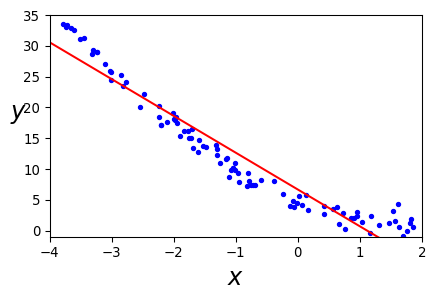

Pendant nos discussions en classe, nous avons abordé les concepts de
**sous-apprentissage** et de **surapprentissage**. Pour approfondir ces
sujets, examinons-les dans le contexte de la **régression polynomiale**.

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

Cet exemple visait à illustrer qu’en pratique, nous avons souvent une
connaissance limitée du modèle sous-jacent qui a généré les données.

## Un ensemble de données non linéaire

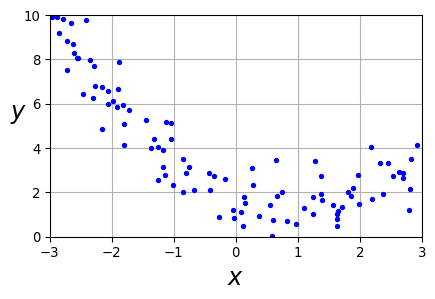

In [5]:
import numpy as np
np.random.seed(42)

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X ** 2 - X + 2 + np.random.randn(100, 1)

**Attribution**: Géron (2022), 4

Dans les expériences en apprentissage automatique, spécifier la graine
du générateur de nombres aléatoires est crucial pour garantir la
reproductibilité. En fixant une graine, les programmeurs peuvent
s’assurer que la même séquence de nombres aléatoires sera générée à
chaque exécution de l’expérience. Cette cohérence est vitale pour
plusieurs raisons :

1.  **Reproductibilité** : Elle permet à d’autres programmeurs de
    répliquer l’expérience dans les mêmes conditions, facilitant ainsi
    la vérification et la validation des résultats.
2.  **Analyse comparative** : Elle permet de comparer de manière
    cohérente différents modèles ou algorithmes sous les mêmes
    conditions initiales, garantissant que les différences observées
    proviennent des modèles eux-mêmes plutôt que des variations dans
    l’initialisation aléatoire.
3.  **Débogage** : Elle facilite le débogage en fournissant un
    environnement stable où les problèmes peuvent être reproduits et
    étudiés de manière constante.

## Régression linéaire

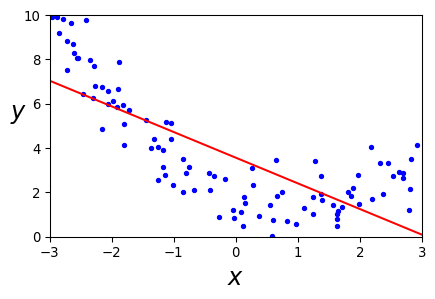

Un modèle linéaire représente mal ce jeu de données

## Définition

**L’ingénierie des attributs** (*feature engineering*) est le processus
de **création**, **transformation** et **sélection** de variables
(attributs) à partir de données brutes afin d’améliorer la performance
des modèles d’apprentissage automatique.

Ici, nous nous concentrons sur la **création** de nouveaux attributs à
partir de données brutes.

## `PolynomialFeatures`

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

. . .

In [8]:
X[0]

array([-0.75275929])

. . .

In [9]:
X_poly[0]

array([-0.75275929,  0.56664654])

. . .

> **
> [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**
>
> Génère une nouvelle matrice d’attributs consistant en toutes les
> combinaisons polynomiales des attributs avec un degré inférieur ou
> égal au degré spécifié. Par exemple, si un échantillon d’entrée est
> bidimensionnel et de la forme $[a, b]$, les attributs polynomiales de
> degré 2 sont $[1, a, b, a^2, ab, b^2]$.

## `PolynomialFeatures`

Avec deux attributs $a$ et $b$, `PolynomialFeatures` avec `degree=3`
ajouterait $a^2$, $a^3$, $b^2$, $b^3$, ainsi que $ab$, $a^2b$, $ab^2$!

. . .

> **Warning**
>
> `PolynomialFeatures(degree=d)` ajoute $\frac{(D+d)!}{d!D!}$ attributs,
> où $D$ est le nombre initial de attributs.

De plus, vous avez la possibilité de créer de nouvelles attributs
vous-même.

## Régression polynomiale

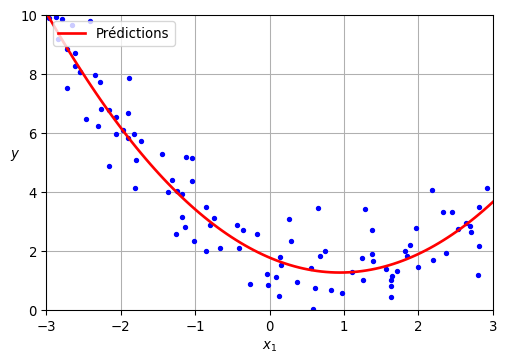

`LinearRegression` sur `PolynomialFeatures`

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

## Régression polynomiale

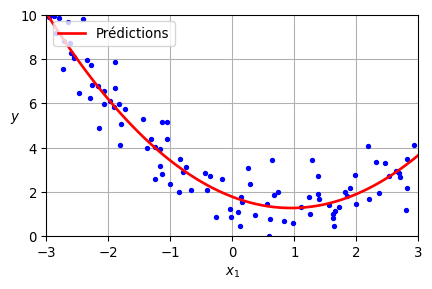

Les données ont été générées selon l’équation suivante, avec l’inclusion
de bruit gaussien.

$$
  y = 0.5 x^2 + 1.0 x + 2.0
$$

Le modèle appris est présenté ci-dessous.

$$
  \hat{y} = 0.56 x^2 + (-1.06) x + 1.78
$$

In [14]:
lin_reg.coef_, lin_reg.intercept_

(array([[-1.06633107,  0.56456263]]), array([1.78134581]))

Compte tenu du bruit présent dans notre ensemble de données, semblable à
ce que l’on peut attendre de données réelles, ce modèle démontre un bon
ajustement.

## Surapprentissage et sous-apprentissage

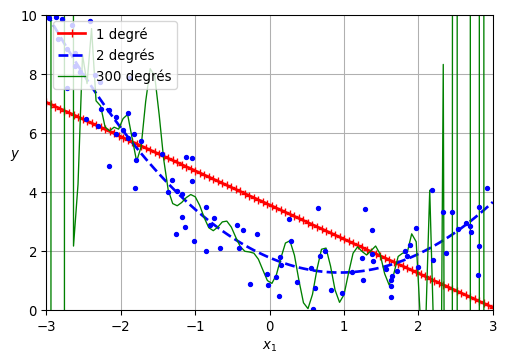

Une **faible valeur de perte** sur l’**ensemble d’entraînement**
n’indique pas nécessairement un “meilleur” modèle.

**Attribution**:
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb)

Dans cet exemple, le modèle de régression linéaire présente un
**sous-apprentissage** des données d’entraînement, comme en témoigne son
erreur quadratique moyenne élevée (perte) sur l’ensemble d’entraînement
(ligne rouge). Cela suggère que le modèle fait de nombreuses erreurs
même sur les données d’entraînement.

À l’inverse, le modèle polynomial avec un degré=300 présente un
**surapprentissage** des données d’entraînement. Il affiche une faible
erreur quadratique moyenne (perte) sur l’ensemble d’entraînement (ligne
verte), ce qui implique qu’il commet peu d’erreurs sur les données
d’entraînement.

Cependant, le modèle polynomial de degré=300 est susceptible de mal
performer lors de futures prédictions. La courbe verte dépasse les
limites de l’image sur l’axe des y. Par exemple, pour des valeurs
d’entrée comprises entre 2 et 3, le modèle prédit des valeurs
supérieures à 10 (ainsi que des valeurs négatives), alors que les
valeurs attendues devraient se situer dans une fourchette de 2 à 4.

Cet exemple illustratif peut sembler simpliste puisque les données sont
générées à partir d’une équation quadratique et ne comportent qu’un seul
attribut, rendant la visualisation simple. Cependant, il permet de
souligner un point clé pertinent pour des modèles plus complexes, tels
que les réseaux de neurones profonds. À mesure que le nombre de
paramètres augmente, la capacité du modèle à ajuster les données
d’entraînement augmente également, ce qui peut entraîner un
surapprentissage si cela n’est pas correctement géré.

## Sous-apprentissage et surapprentissage

-   **Sous-apprentissage (*underfitting*):**
    -   Votre modèle est **trop simple** (ici, linéaire).
    -   attributs non informatives.
    -   **Mauvaises** performances à la fois sur les **données
        d’entraînement** et sur les **données de test**.
-   **Surapprentissage (*overfitting*):**
    -   Votre modèle est **trop complexe** (arbre de décision trop
        profond, réseaux neuronaux profonds et larges, etc.).
    -   **Trop de attributs** par rapport au nombre d’exemples
        disponibles.
    -   **Excellentes** performances sur l’**ensemble d’entraînement**,
        mais **mauvaises** performances sur l’**ensemble de test**.

Dans le cas du sous-apprentissage, ajouter plus de données à l’ensemble
d’entraînement ne sera pas utile.

Dans le cas du surapprentissage, ajouter plus de données rapprocherait
les courbes d’apprentissage de l’ensemble d’entraînement et de
l’ensemble de test.

## Courbes d’apprentissage

-   Une manière d’**évaluer nos modèles** est de visualiser les
    **courbes d’apprentissage** :
    -   Une **courbe d’apprentissage** montre la performance de notre
        modèle, ici en utilisant la RMSE, à la fois sur l’**ensemble
        d’entraînement** et l’**ensemble de test**.
    -   Plusieurs **mesures** sont obtenues en formant à plusieurs
        reprises le modèle sur des sous-ensembles de données de plus en
        plus grands.

**Voir** :
[sklearn.model_selection.learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html).

## Sous-apprentissage

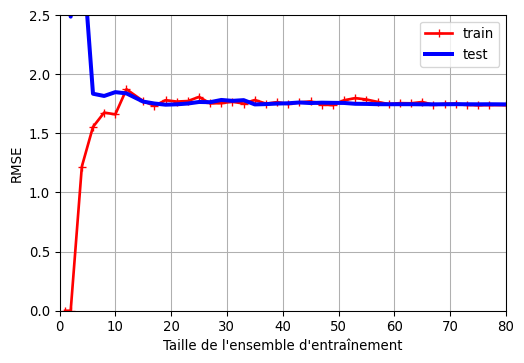

**Mauvaise** performance à la fois sur les **données d’entraînement** et
les **données de test**.

**Code source** :
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb).

Ce graphique illustre la courbe d’apprentissage pour un modèle de
régression linéaire appliqué à des données générées à partir d’une
équation quadratique, ce qui sert d’exemple dans notre cours.

L’axe horizontal représente la taille de l’ensemble d’entraînement.
Initialement, le modèle de régression linéaire est entraîné sur un très
petit ensemble de données, composé d’un ou de quelques exemples
seulement, et la Root Mean Square Error (RMSE) est tracée pour les
ensembles d’entraînement et de test. La taille de l’ensemble
d’entraînement est ensuite augmentée progressivement, un nouveau modèle
est formé, et la performance est enregistrée. Cette procédure continue
jusqu’à ce que l’ensemble complet de données soit utilisé.

Les principales observations à retenir du graphique sont :

-   Avec un ou deux exemples seulement, le modèle ajuste parfaitement
    l’ensemble d’entraînement, ce qui se traduit par une faible RMSE
    pour les données d’entraînement.

-   À mesure que la taille de l’ensemble d’entraînement augmente, le
    modèle a du mal à ajuster les données d’entraînement en raison de la
    nature quadratique du processus de génération des données. En
    conséquence, la RMSE pour l’ensemble d’entraînement augmente et se
    stabilise à un niveau plus élevé.

-   Pour les petits ensembles d’entraînement, le modèle performe mal sur
    l’ensemble de test en raison d’une généralisation inadéquate, ce qui
    entraîne une RMSE élevée.

-   À mesure que la taille de l’ensemble d’entraînement augmente, la
    performance sur l’ensemble de test s’améliore, comme l’indique la
    diminution de la RMSE, jusqu’à atteindre un point où les
    augmentations supplémentaires de la taille de l’ensemble
    d’entraînement n’apportent pas d’améliorations significatives.

Ces courbes d’apprentissage sont indicatives d’un modèle qui présente un
sous-apprentissage. Les courbes RMSE des ensembles d’entraînement et de
test se stabilisent à des valeurs relativement élevées et restent
proches l’une de l’autre, comme mentionné par Géron (2022).

## Surapprentissage

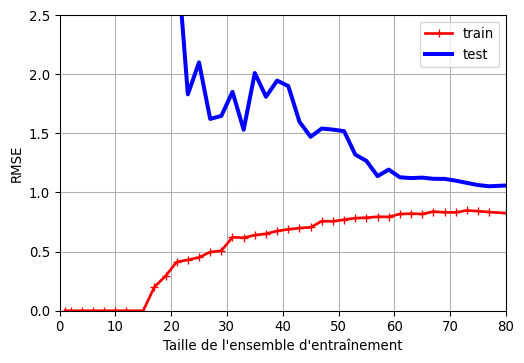

**Excellentes** performances sur l’**ensemble d’entraînement**, mais
**mauvaises** performances sur l’**ensemble de test**.

Modèle polynomial avec **degré=14**.

-   Pour un ensemble d’entraînement comprenant jusqu’à 14 points de
    données, le polynôme ajuste parfaitement les données d’entraînement,
    ce qui entraîne une RMSE de zéro.

-   L’erreur sur les **données d’entraînement** est ici
    significativement plus faible.

-   Un écart notable entre les deux courbes indique que le modèle
    performe beaucoup mieux sur les données d’entraînement que sur les
    données de test.

## Surapprentissage - réseaux profonds

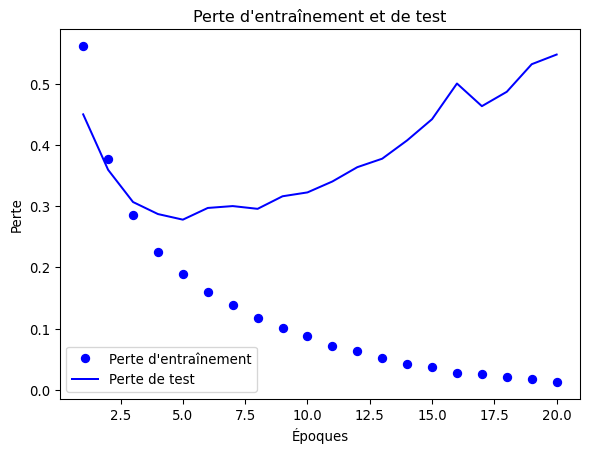

Exemple tiré de Chollet (2017) Chapitre 3
([chapter04_getting-started-with-neural-networks.ipynb](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb),
ipynb de l’édition 2021).

Nous aborderons les réseaux de neurones en détail plus tard dans notre
cours. Le graphique présenté ici illustre la variation de la fonction de
perte au fur et à mesure que le modèle d’apprentissage profond est
entraîné.

Cet exemple utilise le [jeu de données de classification de critiques de
films IMDB disponible dans Keras](https://keras.io/api/datasets/imdb/).
Le jeu de données contient 25 000 critiques de films provenant de
[IMDB](https://www.imdb.com), chacune étiquetée avec un sentiment
(positif ou négatif).

Le modèle se compose de trois couches denses avec des tailles
respectives de 16, 16 et 1. Il comprend un total de 160 305 paramètres
entraînables.

Le réseau est entraîné en utilisant la descente de gradient stochastique
par mini-lots avec une taille de lot de 512. L’axe horizontal représente
le nombre d’époques, où chaque époque indique que le modèle a vu
l’ensemble d’entraînement complet une fois. Pendant chaque époque,
l’algorithme de descente de gradient stochastique met à jour les
paramètres du modèle de manière itérative en utilisant des mini-lots de
512 exemples.

J’ai sélectionné cet exemple pour illustrer qu’un réseau de neurones
avec une capacité suffisante (nombre de paramètres) peut minimiser les
erreurs d’entraînement presque à zéro, car la réduction des erreurs
d’entraînement est l’objectif principal de l’optimisation. Cependant, le
graphique montre clairement qu’au-delà d’un certain point, les modèles
appris deviennent spécifiques à l’ensemble d’entraînement plutôt que de
capturer des principes généraux. L’objectif final de l’apprentissage
automatique est de généraliser plutôt que de mémoriser.

Le surapprentissage survient lorsqu’un modèle apprend les détails et le
bruit des données d’entraînement au point de nuire à sa performance sur
des données nouvelles. Cela peut entraîner une frontière de décision qui
s’ajuste trop étroitement aux données d’entraînement, capturant le bruit
et les détails non pertinents plutôt que des schémas généraux.

## Surapprentissage - réseaux profonds

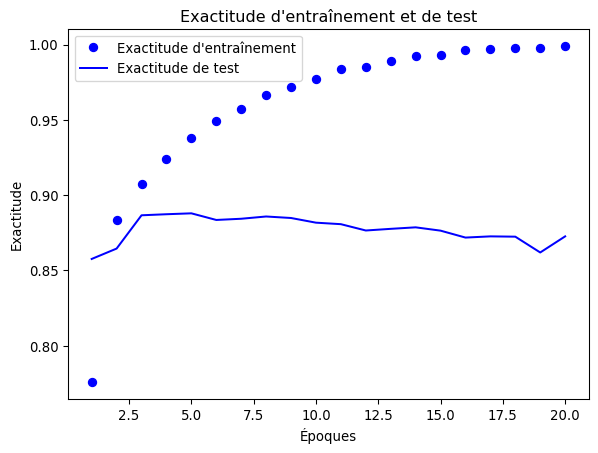

Ce graphique illustre de la même manière la variation de l’exactitude
pour les ensembles d’entraînement et de test au fur et à mesure que le
modèle est entraîné.

## Compromis biais/variance

-   **Biais** :
    -   Erreur provenant de modèles trop simples
    -   Un biais élevé peut entraîner un sous-apprentissage
-   **Variance** :
    -   Erreur provenant de modèles trop complexes
    -   Sensibilité aux fluctuations dans les données d’entraînement
    -   Une variance élevée peut entraîner un surapprentissage
-   **Compromis** :
    -   Objectif : un modèle qui généralise bien à de nouvelles données
    -   Méthodes : validation croisée, régularisation, apprentissage
        ensembliste

Hastie, Tibshirani, et Friedman (2009)

## Vidéos connexes

<https://youtu.be/tUs0fFo7ki8>

Autres vidéos :

-   [Biais et Variance, StatQuest](https://youtu.be/EuBBz3bI-aA)
    (excellent résumé visuel)
-   [Biais/Variance (C2W1L02), Stanford, Andrew
    Ng](https://youtu.be/SjQyLhQIXSM)
-   [Intuition derrière le biais et la variance, Sebastian
    Raschka](https://youtu.be/DCk-p6MsiWA)

# Mesures de performance

## Matrice de confusion

|                        | **Positif** (**Prédit**) | **Négatif** (**Prédit**) |
|--------------------------|-----------------------|-----------------------|
| **Positif** (**Réel**) | Vrai positif (VP)        | Faux négatif (FN)        |
| **Négatif** (**Réel**) | Faux positif (FP)        | Vrai négatif (VN)        |

Une **matrice de confusion** (*confusion matrix*) est un tableau qui
résume les performances d’un algorithme de classification (ici pour une
tâche de classification binaire).

-   En analyse statistique, les **Faux Positifs (FP)** sont couramment
    appelés **erreurs de type I**, et les **Faux Négatifs (FN)** sont
    connus sous le nom d’**erreurs de type II**.

-   La **matrice de confusion** encapsule toutes les informations
    essentielles nécessaires pour évaluer les performances d’un modèle
    de classification.

-   Bien que la matrice de confusion fournisse une vue complète, des
    mesures **concises** telles que **l’exactitude**, **la précision**,
    **le rappel**, et le **score F$_1$** sont souvent plus intuitives et
    pratiques pour résumer les performances d’un modèle.

## sklearn.metrics.confusion_matrix

In [24]:
from sklearn.metrics import confusion_matrix

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

confusion_matrix(y_actual,y_pred)

array([[1, 2],
       [3, 4]])

. . .

In [25]:
tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
(tn, fp, fn, tp)

(1, 2, 3, 4)

## Prédiction parfaite

In [26]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

confusion_matrix(y_actual,y_pred)

array([[4, 0],
       [0, 6]])

. . .

In [27]:
tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()    
(tn, fp, fn, tp)

(4, 0, 0, 6)

## Matrice de confusion - plusieurs classes

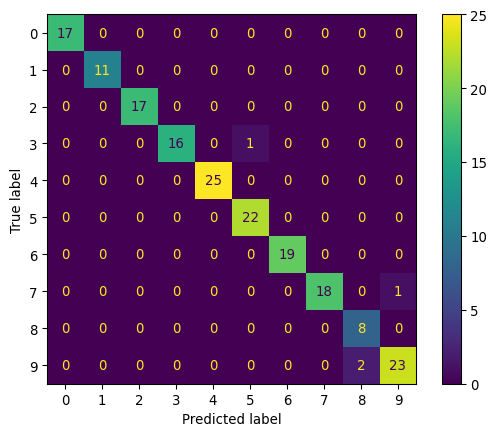

**Matrice de confusion** pour l’**exemple des chiffres** présenté lors
du cours précédent.

L’image montre une carte thermique de la matrice de confusion pour la
tâche de classification des chiffres. Cette tâche, un problème de
classification multiclasses, a été traitée à l’aide de
`OneVsRestClassifier` et de `LogisticRegression`.

La matrice de confusion résume les prédictions effectuées sur l’ensemble
de test, qui est un sous-ensemble des données qui n’a été utilisé ni
pour l’entraînement ni pour la normalisation avec `StandardScaler`.

La matrice de confusion encapsule tous les résultats issus de
l’application du classificateur à l’ensemble de test. Cependant, pour
résumer ces informations de manière plus concise, nous faisons souvent
référence à des mesures de performance.

## Code source

In [29]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())

clf = clf.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

## Visualisation des erreurs

In [30]:
mask = (y_test == 9) & (y_pred == 8)

X_9_as_8 = X_test[mask]

y_9_as_8 = y_test[mask]

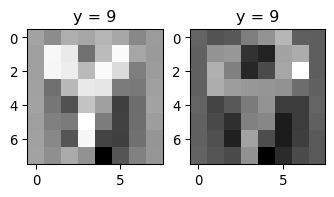

Dans la matrice de confusion de l’écran précédent, nous avons vu qu’il y
avait des exemples pour lesquels l’étiquette réelle était 9, mais la
prédiction était 8. Nous pouvons visualiser les exemples pour voir si
nous comprenons la nature de ces erreurs.

## Matrice de confusion - plusieurs classes

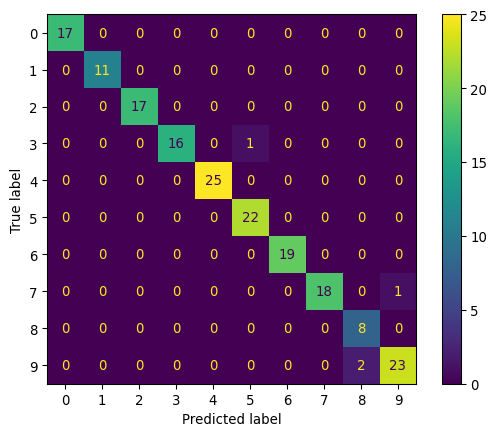

Il est souvent préférable de résumer la performance du classificateur
avec une seule métrique.

## Exactitude

Quelle est **l’exactitude** de ce résultat ?

$$
  \mathrm{exactitude} = \frac{\mathrm{VP}+\mathrm{VN}}{\mathrm{VP}+\mathrm{VN}+\mathrm{FP}+\mathrm{FN}} = \frac{\mathrm{VP}+\mathrm{VN}}{\mathrm{N}}
$$

In [33]:
from sklearn.metrics import accuracy_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

accuracy_score(y_actual,y_pred)

0.5

**L’exactitude** (*accuracy*) est le rapport entre le nombre de
prédictions correctes et le nombre total de prédictions.

## Exactitude

In [34]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [1, 0, 1, 1, 0, 0, 0, 1, 0, 0]

accuracy_score(y_actual,y_pred)

0.0

In [35]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

accuracy_score(y_actual,y_pred)

1.0

**L’exactitude** est un nombre compris entre 0 (tout est faux) et 1
(parfait).

## L’exactitude peut induire en erreur

In [36]:
y_actual = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
y_pred   = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

accuracy_score(y_actual,y_pred)

0.8

**Pourquoi** est-ce problématique ?

L’exactitude peut induire en erreur en présence de **déséquilibre de
classes**, car elle reflète de manière disproportionnée la performance
sur la classe majoritaire, masquant ainsi la mauvaise performance sur la
classe minoritaire.

À mesure que le **déséquilibre des classes augmente**, la métrique
d’exactitude devient **de plus en plus trompeuse**.

## Précision

Aussi appelée **valeur prédictive positive** (PPV).

$$
  \mathrm{précision} = \frac{\mathrm{VP}}{\mathrm{VP}+\mathrm{FP}}
$$

In [37]:
from sklearn.metrics import precision_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

precision_score(y_actual, y_pred)

0.6666666666666666

**La précision** est la proportion de **prédictions positives
correctes** parmi toutes les **prédictions positives**.

## La précision seule ne suffit pas

In [38]:
y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

precision_score(y_actual,y_pred)

1.0

Un algorithme qui fait un petit nombre de prédictions à haute confiance
peut obtenir un score de précision élevé, mais cela ne signifie pas
nécessairement qu’il est utile.

## Rappel

Aussi appelé **sensibilité** ou **taux de vrais positifs** (TVP). $$
  \mathrm{rappel} = \frac{\mathrm{VP}}{\mathrm{VP}+\mathrm{FN}}
$$

In [39]:
from sklearn.metrics import recall_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

recall_score(y_actual,y_pred)

0.5714285714285714

**Le rappel** (*recall*) est la proportion de vrais positifs
correctement identifiés parmi tous les cas positifs réels.

## Score F$_1$

$$
\begin{align*}
  F_1~\mathrm{score} &= \frac{2}{\frac{1}{\mathrm{précision}}+\frac{1}{\mathrm{rappel}}} = 2 \times \frac{\mathrm{précision}\times\mathrm{rappel}}{\mathrm{précision}+\mathrm{rappel}} \\
                     &= \frac{\mathrm{VP}}{\mathrm{FP}+\frac{\mathrm{FN}+\mathrm{FP}}{2}}
\end{align*}
$$

In [40]:
from sklearn.metrics import f1_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

f1_score(y_actual,y_pred)

0.6153846153846154

Le **score F$_1$** est la **moyenne harmonique** entre la précision et
le rappel.

-   La moyenne harmonique donne plus de poids aux valeurs faibles,
    tandis que la moyenne arithmétique traite toutes les valeurs de
    manière égale.
-   L’utilisation de la moyenne harmonique garantit qu’un score élevé
    n’est atteint que lorsque la précision et le rappel sont tous deux
    élevés, ce qui fournit une mesure plus holistique des performances
    d’un classificateur dans les scénarios où les jeux de données sont
    déséquilibrés.
-   Le score F$_1$ favorise les classificateurs qui atteignent un
    équilibre entre la précision et le rappel.
-   Augmenter le **rappel** se fait souvent au détriment de la
    **précision**, et vice versa. Ce phénomène est connu sous le nom de
    **compromis précision/rappel**.

## Mesures de performance micro

Les mesures de performance micro **agrègent les contributions de toutes
les classes** pour calculer la moyenne des mesures de performance,
telles que la précision, le rappel ou le score F1. Cette approche
**considère chaque prédiction individuelle de manière égale**, ce qui
permet une évaluation équilibrée en mettant l’accent sur la performance
des classes fréquentes.

## Mesures de performance macro

Les mesures de performance macro **calculent les mesures de performance
indépendamment pour chaque classe et ensuite les moyennent**. Cette
approche **considère chaque classe de manière égale**, quelle que soit
sa fréquence, fournissant une évaluation qui accorde la même importance
aux performances sur les classes fréquentes et rares.

## Précision micro/macro

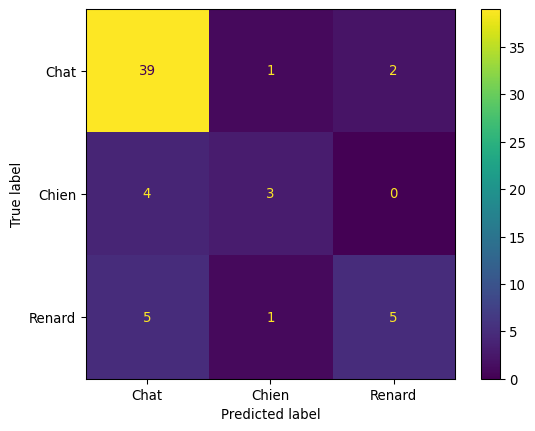

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

# Données d'exemple
y_true = ['Chat'] * 42 + ['Chien'] *  7 + ['Renard'] * 11
y_pred = ['Chat'] * 39 + ['Chien'] *  1 + ['Renard'] *  2 + \
         ['Chat'] *  4 + ['Chien'] *  3 + ['Renard'] *  0 + \
         ['Chat'] *  5 + ['Chien'] *  1 + ['Renard'] *  5

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

Le jeu de données peut être conceptualisé comme résultant d’une tâche de
**classification d’images**, impliquant des images de **chats**,
**chiens**, et **renards**. Comme cela est souvent le cas sur internet,
les images de chats sont disproportionnellement représentées, ce qui
conduit à un problème de **déséquilibre des classes**.

## Précision micro/macro

In [42]:
from sklearn.metrics import classification_report, precision_score

print(classification_report(y_true, y_pred), "\n")

print("Précision micro : {:.2f}".format(precision_score(y_true, y_pred, average='micro')))
print("Précision macro : {:.2f}".format(precision_score(y_true, y_pred, average='macro')))

              precision    recall  f1-score   support

        Chat       0.81      0.93      0.87        42
       Chien       0.60      0.43      0.50         7
      Renard       0.71      0.45      0.56        11

    accuracy                           0.78        60
   macro avg       0.71      0.60      0.64        60
weighted avg       0.77      0.78      0.77        60
 

Précision micro : 0.78
Précision macro : 0.71

La **précision macro-pondérée** est calculée comme la moyenne des scores
de **précision** pour chaque classe :
$\frac{0.81 + 0.60 + 0.71}{3} = 0.71$.

Alors que la **précision micro-pondérée** est calculée en utilisant la
formule $\frac{VP}{VP+FP}$ et les **données provenant de toute la
matrice de confusion**
$\frac{39+3+5}{39+3+5+9+2+2} = \frac{47}{60} = 0.78$

La haute précision micro observée ici est principalement due à la haute
précision et au grand nombre d’exemples dans la classe majoritaire, le
chat. Cela masque la performance relativement faible du classificateur
sur les classes minoritaires, le chien et le renard.

Dans un jeu de données équilibré, les mesures micro et macro produisent
des scores similaires.

Cependant, dans un jeu de données déséquilibré, des différences
significatives dans les performances du classificateur entre la classe
majoritaire et les classes minoritaires se traduiront par des écarts
entre les scores micro et macro. En particulier, le classificateur a
tendance à sous-performer sur la/les classe(s) minoritaire(s), ce qui
entraîne ces divergences.

Dans les **mesures macro**, chaque classe contribue de manière égale au
calcul de la mesure globale, **indépendamment du nombre d’exemples
qu’elle contient**. Cela signifie que la mesure de performance pour
chaque classe est calculée indépendamment puis moyennée, sans tenir
compte de la proportion d’instances que chaque classe représente dans le
jeu de données. Par conséquent, la macro-moyenne garantit que **chaque
classe a un impact égal sur la mesure globale**, ce qui peut être
particulièrement utile dans les cas où la distribution des classes est
déséquilibrée.

## Rappel micro/macro

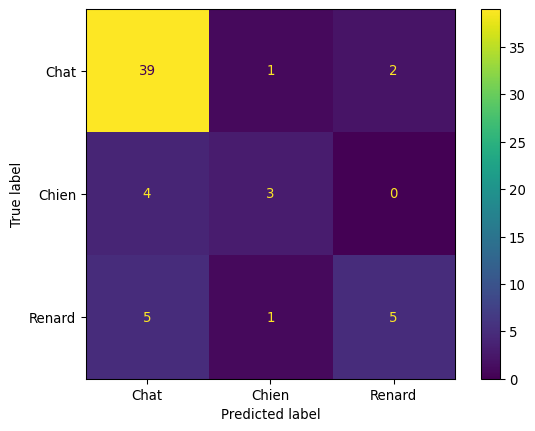

              precision    recall  f1-score   support

        Chat       0.81      0.93      0.87        42
       Chien       0.60      0.43      0.50         7
      Renard       0.71      0.45      0.56        11

    accuracy                           0.78        60
   macro avg       0.71      0.60      0.64        60
weighted avg       0.77      0.78      0.77        60
 

Rappel micro : 0.78
Rappel macro : 0.60

Le **rappel macro-moyen** est calculé comme la **moyenne des scores de
rappel pour chaque classe** : $\frac{0.93 + 0.43 + 0.45}{3} = 0.60$.

Alors que le **rappel micro-moyen** est calculé en utilisant la formule
$\frac{VP}{VP+FN}$ et les **données provenant de toute la matrice de
confusion** $\frac{39+3+5}{39+3+5+3+4+6} = \frac{47}{60} = 0.78$

## Mesures micro/macro (données médicales)

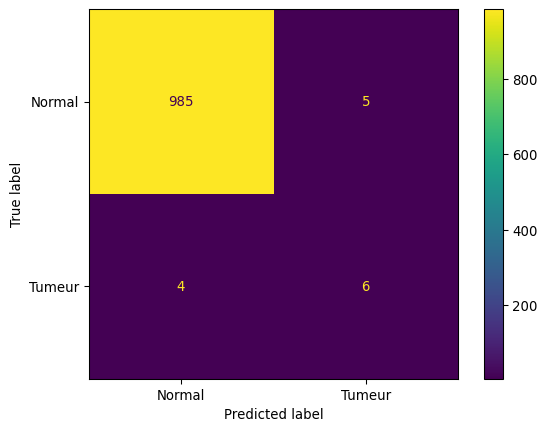

Considérons un jeu de données médical, tel que ceux impliquant des tests
de diagnostic ou d’imagerie, composé de 990 échantillons normaux et 10
échantillons anormaux (tumeurs). Cela représente la vérité terrain.

## Mesures micro/macro (données médicales)

              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       990
      Tumeur       0.55      0.60      0.57        10

    accuracy                           0.99      1000
   macro avg       0.77      0.80      0.78      1000
weighted avg       0.99      0.99      0.99      1000
 

Précision micro : 0.99
Précision macro : 0.77


Rappel micro : 0.99
Rappel macro : 0.80

## Chiffres manuscrits (réexaminés)

Chargement du jeu de données

In [47]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import fetch_openml

digits = fetch_openml('mnist_784', as_frame=False)
X, y = digits.data, digits.target

Affichage des cinq premiers exemples

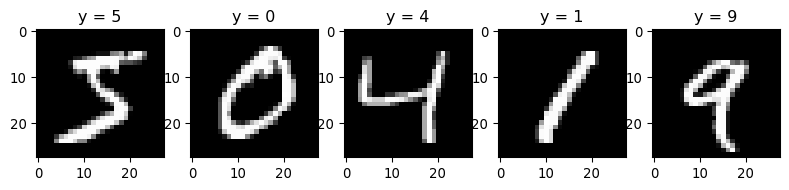

Ces images ont des dimensions de ( 28 ) pixels.

## Création d’une tâche de classification binaire

In [49]:
# Création d'une tâche de classification binaire (un contre le reste)

some_digit = X[0]
some_digit_y = y[0]

y = (y == some_digit_y)
y

array([ True, False, False, ..., False,  True, False])

. . .

In [50]:
# Création des ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## `SGDClassifier`

In [51]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)

clf.predict(X[0:5]) # petite vérification de cohérence

array([ True, False, False, False, False])

Le `SGDClassifier` est un classificateur linéaire qui utilise la
descente de gradient stochastique (SGD) pour l’entraînement. Comparé à
`LogisticRegression`, il peut offrir des temps d’entraînement plus
rapides, en particulier pour les grands jeux de données. De plus,
`SGDClassifier` permet d’ajuster le seuil de décision dans les exemples
suivants.

## Performance

In [52]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9572857142857143

Wow !

## Pas si vite

. . .

In [54]:
y_pred = dummy_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.906

Le
[DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
dans scikit-learn génère des prédictions sans prendre en compte les
attributs d’entrée. Par défaut, il prédit toujours l’étiquette de classe
la plus fréquente dans les données d’entraînement. Il s’agit d’un
classificateur de base simple.

Pourquoi l’exactitude est-elle si élevée alors que ce classificateur
ignore les données d’entrée ?

La haute exactitude est due à la distribution des classes dans le jeu de
données. Environ 10 % des échantillons correspondent au chiffre ‘5’, qui
est la classe positive dans notre tâche de classification binaire. Par
conséquent, environ 90 % des échantillons sont “non 5” et appartiennent
à la classe négative. Étant donné que le DummyClassifier prédit toujours
la classe majoritaire, son exactitude est censée être autour de 90 %.

Cela souligne le fait que l’exactitude n’est souvent pas la meilleure
mesure, en particulier lorsque les jeux de données sont déséquilibrés.

## Compromis précision-rappel

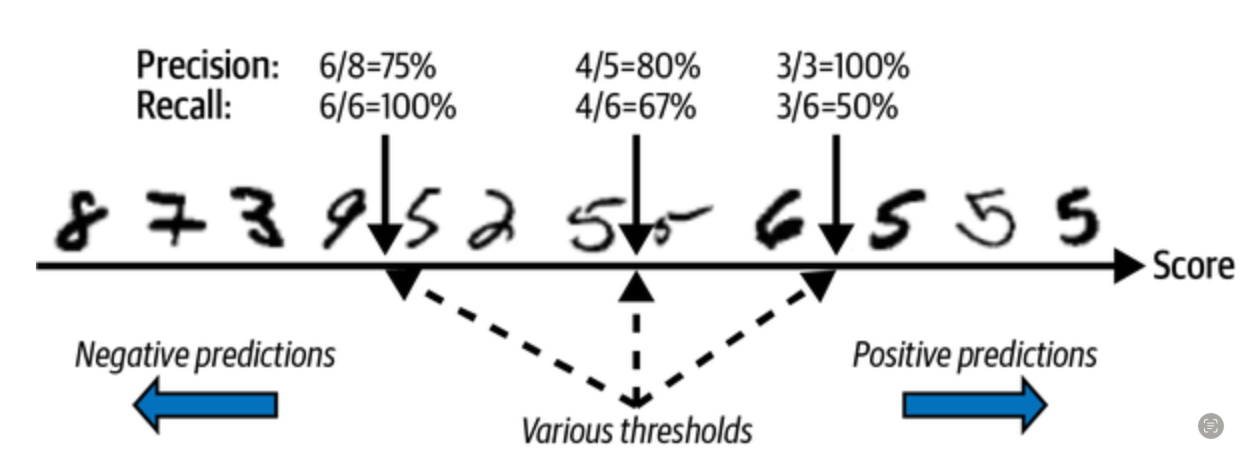

**Attribution** : Géron (2022) Figure 3.4

## Compromis précision-rappel

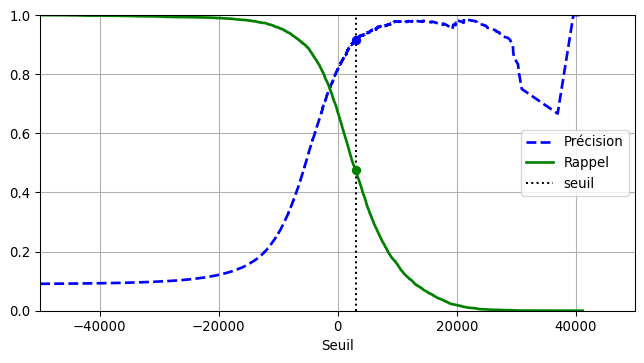

J’ai utilisé `SGDClassifier` car il permet de faire varier le seuil de
décision (frontière) pour produire un graphique illustrant le compromis
précision-rappel.

À mesure que le seuil de décision diminue, un plus grand nombre
d’exemples sont prédits comme positifs, ce qui peut amener le
classificateur à finalement étiqueter tous les exemples comme positifs.

À l’inverse, à mesure que le seuil de décision augmente, moins
d’exemples sont classés comme positifs, ce qui peut entraîner un
classificateur qui ne prédit aucun cas positif.

Dans certaines applications, un classificateur avec une haute précision
est essentiel. Par exemple, considérons un scénario où chaque prédiction
nécessite une expérience en laboratoire coûteuse pour vérifier son
exactitude, comme dans une entreprise pharmaceutique qui cherche à
découvrir de nouveaux médicaments. Ici, le classificateur prédit si un
composé est actif. Compte tenu du coût élevé des expériences pour
valider les candidats, l’entreprise privilégierait la focalisation sur
les composés les plus prometteurs en premier.

En revanche, dans un scénario de dépistage du cancer, tel que
l’utilisation de mammographies pour détecter le cancer du sein, il peut
être préférable d’abaisser le seuil de décision, augmentant ainsi le
nombre de faux positifs. Bien que cela entraîne plus de patients à subir
des tests supplémentaires, comme des biopsies, cela peut potentiellement
sauver plus de vies en veillant à ce que moins de cas de cancer passent
inaperçus.

## Courbe précision/rappel

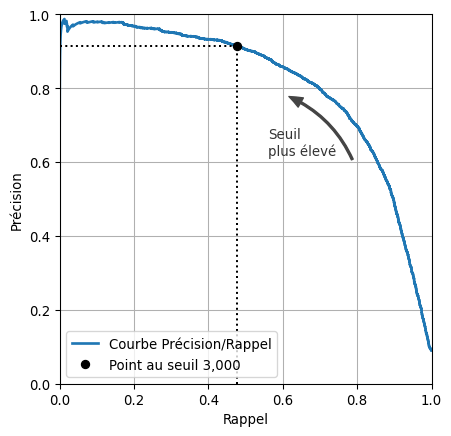

## Courbe ROC

**Receiver Operating Characteristics (ROC) curve**

-   **Taux de vrais positifs** (TVP) contre **taux de faux positifs**
    (TFP)
-   Un classificateur idéal a un **TVP** proche de **1.0** et un **TFP**
    proche de **0.0**
-   $\mathrm{TVP} = \frac{\mathrm{VP}}{\mathrm{VP}+\mathrm{FN}}$
    (rappel, sensibilité)
-   **TVP** approche de **1** lorsque le nombre de **faux négatifs** est
    faible
-   $\mathrm{TFP} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{VN}}$ (aussi
    appelé~\[1-spécificité\])
-   **TFP** approche de **0** lorsque le nombre de **faux positifs** est
    faible

Les courbes ROC (Receiver Operating Characteristic) sont populaires en
apprentissage automatique et en statistiques pour plusieurs raisons :

1.  **Évaluation complète des performances** : Les courbes ROC offrent
    une représentation visuelle des performances d’un classificateur sur
    tous les seuils possibles. En traçant le Taux de Vrais Positifs
    (TVP) contre le Taux de Faux Positifs (TFP), elles permettent aux
    praticiens d’évaluer le compromis entre la sensibilité (rappel) et
    la spécificité.

2.  **Indépendance par rapport au seuil** : Contrairement à des
    métriques comme l’exactitude, les courbes ROC évaluent les
    performances du classificateur sans dépendre d’un seuil de décision
    spécifique. Cela les rend particulièrement utiles pour comparer des
    modèles à différents seuils.

3.  **Gestion des ensembles de données déséquilibrés** : Pour les
    ensembles de données avec un déséquilibre des classes (où une classe
    est beaucoup plus fréquente que l’autre), les courbes ROC sont plus
    informatives que l’exactitude, qui peut être trompeuse. La courbe
    capture la capacité du modèle à distinguer les classes
    indépendamment de leur distribution.

4.  **Surface sous la courbe (AUC)** : La Surface Sous la Courbe ROC
    (AUC) fournit un résumé unique des performances du modèle. L’AUC-ROC
    est souvent utilisée comme une métrique de référence pour comparer
    différents modèles, avec des valeurs allant de 0.5 (devinette
    aléatoire) à 1.0 (classification parfaite).

5.  **Applicabilité large** : Les courbes ROC peuvent être utilisées
    pour toute tâche de classification binaire et sont facilement
    étendues aux problèmes multiclasses avec des techniques comme la
    classification un-contre-tous, ce qui les rend polyvalentes pour
    évaluer les classificateurs.

Dans l’ensemble, leur capacité à offrir une vue large des performances
d’un modèle, indépendante des seuils, notamment dans des scénarios de
déséquilibre, fait des courbes ROC un choix populaire pour évaluer les
classificateurs.

## Courbe ROC

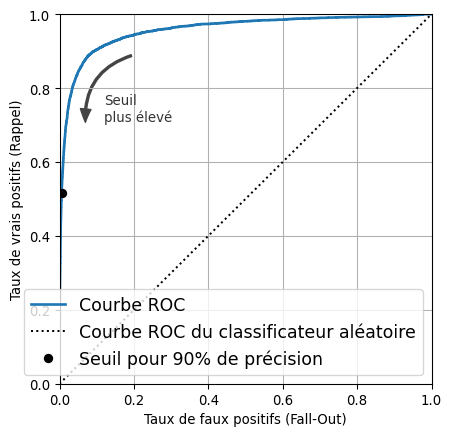

**Attribution :**
[03_classification.ipynb](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb)

Il est courant de mesurer la surface sous la courbe, représentée par
AUC, qui est spécifiquement la surface sous la courbe ROC. Cela permet
de comparer les modèles de manière plus quantitative.

## AUC/ROC

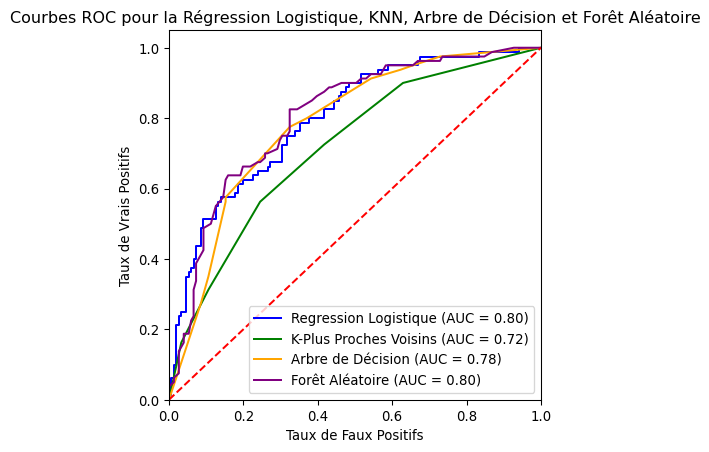

Le modèle a été entraîné en utilisant le [jeu de données Pima Indians
Diabetes](https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=diabetes&id=37)
tel que décrit par Knowler et al. (1981)
\[[PubMed](https://pubmed.ncbi.nlm.nih.gov/7468572/)\]. Des détails
supplémentaires sur le jeu de données seront discutés lors du prochain
cours.

Les courbes ROC fournissent une représentation visuelle des performances
d’un classificateur à travers **tous les seuils possibles**. En traçant
le Taux de Vrais Positifs (TPR) contre le Taux de Faux Positifs (FPR),
elles permettent aux praticiens d’évaluer le compromis entre sensibilité
(rappel) et spécificité.

Contrairement à des métriques telles que l’exactitude, les courbes ROC
évaluent les performances du classificateur **sans se baser sur un seuil
de décision spécifique**. Cela les rend particulièrement utiles pour
**comparer des modèles à travers différents seuils**.

## Les 7 étapes de l’apprentissage automatique

<https://youtu.be/nKW8Ndu7Mjw>

## Prologue

## Lectures complémentaires

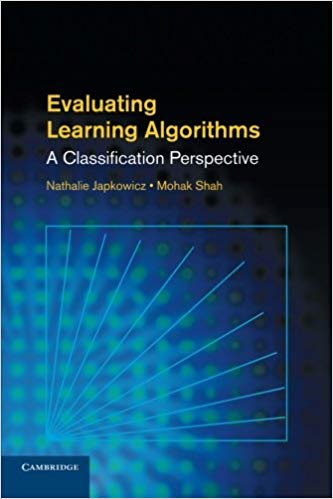

Japkowicz et Shah (2011)

Ce livre, qui examine divers aspects du processus d’évaluation avec un
accent sur les algorithmes de classification, est très bien noté sur
Amazon !

[Nathalie Japkowicz](https://www.american.edu/cas/faculty/japkowic.cfm)
était auparavant professeure à l’Université d’Ottawa. Elle travaille
désormais à l’American University à Washington.

[Mohak Shah](http://www.mohakshah.com) a terminé son doctorat à
l’Université d’Ottawa. Il a occupé plusieurs postes dans l’industrie,
notamment Vice-Président pour l’intelligence artificielle et
l’apprentissage automatique chez LG Electronics.

## Prochain cours

-   Nous examinerons la validation croisée et le réglage des
    hyperparamètres.

## Références

Chollet, François. 2017. *Deep learning with Python*. Manning
Publications.

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3ᵉ éd. O’Reilly Media, Inc.

Hastie, Trevor, Robert Tibshirani, et Jerome H. Friedman. 2009. *The
Elements of Statistical Learning: Data Mining, Inference, and
Prediction, 2nd Edition*. Springer Series in Statistics. Springer.
<https://doi.org/10.1007/978-0-387-84858-7>.

Japkowicz, Nathalie, et Mohak Shah. 2011. *Evaluating Learning
Algorithms: a classification perspective*. Cambridge: Cambridge
University Press.
<http://assets.cambridge.org/97805211/96000/cover/9780521196000.jpg>.

Russell, Stuart, et Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4ᵉ éd. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

École de **science informatique** et de génie électrique (**SI**GE)

Université d’Ottawa